In [1]:
# Testing Raw Data

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import iqr
plt.style.use('ggplot')
from sklearn import preprocessing

In [3]:
# Importing Excel file, calling the DataFrame comp_df
df = pd.read_excel("default.xls", index_col=0, header=0)
df = df.iloc[1:, :]
# Checking import 
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Checking out the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
X1     30000 non-null object
X2     30000 non-null object
X3     30000 non-null object
X4     30000 non-null object
X5     30000 non-null object
X6     30000 non-null object
X7     30000 non-null object
X8     30000 non-null object
X9     30000 non-null object
X10    30000 non-null object
X11    30000 non-null object
X12    30000 non-null object
X13    30000 non-null object
X14    30000 non-null object
X15    30000 non-null object
X16    30000 non-null object
X17    30000 non-null object
X18    30000 non-null object
X19    30000 non-null object
X20    30000 non-null object
X21    30000 non-null object
X22    30000 non-null object
X23    30000 non-null object
Y      30000 non-null object
dtypes: object(24)
memory usage: 5.7+ MB


In [5]:
df = df.astype(int)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# **Splitting and Resampling Data**

In [6]:
X = df.iloc[:,:-1] # Features
y = df.Y # Target variable

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2019)

In [8]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2019)
X_train_resample, y_train_resample = ros.fit_resample(X_train, y_train)

# **Logistic Regression**

In [23]:
cols = df.columns.values
print(cols)

['X1' 'X2' 'X3' 'X4' 'X5' 'X6' 'X7' 'X8' 'X9' 'X10' 'X11' 'X12' 'X13'
 'X14' 'X15' 'X16' 'X17' 'X18' 'X19' 'X20' 'X21' 'X22' 'X23' 'Y']


In [42]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear')

# fit the model with data
logreg = logreg.fit(X_train_resample,y_train_resample)

#
y_pred=logreg.predict(X_test)

In [43]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[3814, 2092],
       [ 544, 1050]])

Text(0.5, 257.44, 'Predicted label')

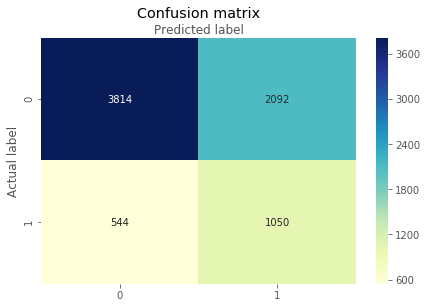

In [44]:
import seaborn as sns


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6485333333333333
Precision: 0.3341820496499045
Recall: 0.6587202007528231


In [46]:
# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# Import Decision Tree Classifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [47]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')  

0.6794693790243869

In [48]:
# lists for f1-score and AUC
f1_score_lst = []
auc_lst = []

#loop to calculate f1 and auc scores and present averages after 10 runs
for count in range (1,10):

    #10-fold cross validation
    kfold = model_selection.KFold(n_splits=10, random_state=2019)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(logreg, X_train_resample, y_train_resample, cv=kfold, scoring=scoring)

    #calculate f1-score and AUC
    roc_auc = roc_auc_score(y_test, y_pred)
    f1_score_lst.append(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2])
    auc_lst.append(roc_auc)


print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(f1_score_lst),np.mean(auc_lst)))

#result=logit_model.fit()
confusion_matrix_y = confusion_matrix(y_test, y_pred)

#print(result.summary())
print('Accuracy of classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print("10-fold cross validation average accuracy of classifier: %.3f" % (results.mean()))
print('Confusion Matrix for Logistic Regression Classfier:')
print(confusion_matrix_y)
print('Classification Report for Logistic Regression Classfier:')
print(classification_report(y_test, y_pred))

F1 0.6795; AUC 0.6523 
Accuracy of classifier on test set: 0.65
10-fold cross validation average accuracy of classifier: 0.576
Confusion Matrix for Logistic Regression Classfier:
[[3814 2092]
 [ 544 1050]]
Classification Report for Logistic Regression Classfier:
              precision    recall  f1-score   support

           0       0.88      0.65      0.74      5906
           1       0.33      0.66      0.44      1594

   micro avg       0.65      0.65      0.65      7500
   macro avg       0.60      0.65      0.59      7500
weighted avg       0.76      0.65      0.68      7500



# **Decision Tree**

In [50]:
# Import Decision Tree Classifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

# Create Decision Tree Classifier Object 
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_resample, y_train_resample)

# Predict the response for test dataset 
y_pred = clf.predict(X_test)

# Model Accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.7301333333333333
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      5906
           1       0.37      0.39      0.38      1594

   micro avg       0.73      0.73      0.73      7500
   macro avg       0.60      0.61      0.60      7500
weighted avg       0.74      0.73      0.73      7500

[[4853 1053]
 [ 971  623]]


In [51]:
# lists for f1-score and AUC
f1_score_lst = []
auc_lst = []


#loop to calculate f1 and auc scores and present averages after 10 runs
for count in range (1,10):

    #10-fold cross validation
    kfold = model_selection.KFold(n_splits=10, random_state=2019)
    scoring = 'accuracy'
    results = model_selection.cross_val_score(clf, X_train_resample, y_train_resample, cv=kfold, scoring=scoring)

    #calculate f1-score and AUC
    clf_roc_auc = roc_auc_score(y_test, y_pred)
    f1_score_lst.append(precision_recall_fscore_support(y_test, y_pred, average='weighted')[2])
    auc_lst.append(clf_roc_auc)


print('F1 {:.4f}; AUC {:.4f} '.format(np.mean(f1_score_lst),np.mean(auc_lst)))

#result=logit_model.fit()
confusion_matrix_y = confusion_matrix(y_test, y_pred)

#print(result.summary())
print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("10-fold cross validation average accuracy of classifier: %.3f" % (results.mean()))
print('Confusion Matrix for Logistic Regression Classfier:')
print(confusion_matrix_y)
print('Classification Report for Logistic Regression Classfier:')
print(classification_report(y_test, y_pred))

F1 0.7326; AUC 0.6063 
Accuracy of classifier on test set: 0.73
10-fold cross validation average accuracy of classifier: 0.892
Confusion Matrix for Logistic Regression Classfier:
[[4853 1053]
 [ 971  623]]
Classification Report for Logistic Regression Classfier:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      5906
           1       0.37      0.39      0.38      1594

   micro avg       0.73      0.73      0.73      7500
   macro avg       0.60      0.61      0.60      7500
weighted avg       0.74      0.73      0.73      7500



In [52]:
feature_importance = pd.Series(clf.feature_importances_, index=df.iloc[:,:-1].columns).sort_values(ascending=False)
feature_importance

X6     0.177731
X5     0.075465
X19    0.069131
X12    0.068543
X1     0.057937
X23    0.056492
X20    0.049636
X18    0.049424
X13    0.048846
X21    0.047404
X16    0.044962
X17    0.043055
X22    0.042623
X15    0.041749
X14    0.034577
X3     0.019036
X9     0.014198
X4     0.012645
X8     0.010816
X7     0.010532
X11    0.009573
X2     0.008370
X10    0.007255
dtype: float64

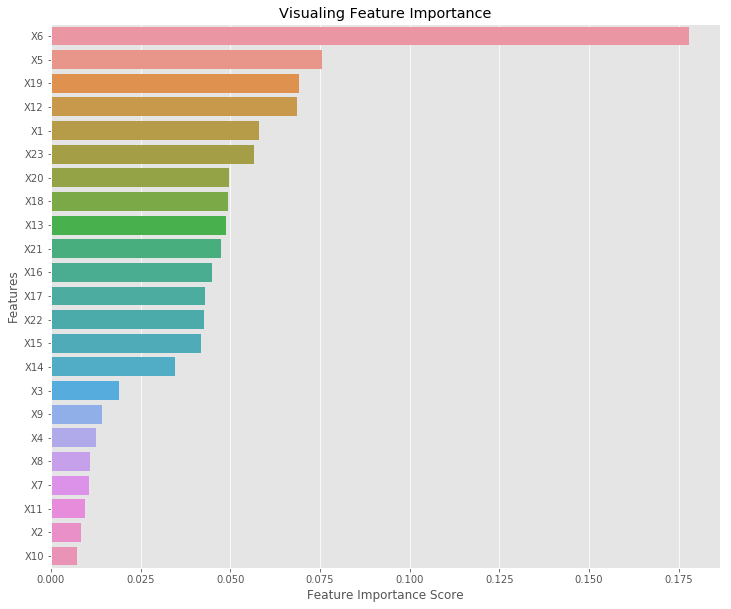

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(12,10))

sns.barplot(x=feature_importance, y=feature_importance.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualing Feature Importance")

plt.show()